In [113]:
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt # plotting
import seaborn as sn 
import pandas as pd 
import numpy as np
import sklearn,  sys, os 
from sklearn.datasets import make_classification, make_biclusters, make_blobs, make_gaussian_quantiles, make_moons, make_circles, make_classification
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler   
from sklearn.model_selection import GridSearchCV
from tabulate import tabulate
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV

#Learning curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import validation_curve

In [114]:
#validation curve
def validation_curve_model(X, Y, model, param_name, parameters, cv, ylim, log=True):

    train_scores, test_scores = validation_curve(model, X, Y, param_name=param_name, param_range=parameters,cv=cv, scoring="accuracy")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title("Validation curve")
    plt.fill_between(parameters, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(parameters, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="g")

    if log==True:
        plt.semilogx(parameters, train_scores_mean, 'o-', color="r",label="Training score")
        plt.semilogx(parameters, test_scores_mean, 'o-', color="g",label="Cross-validation score")
    else:
        plt.plot(parameters, train_scores_mean, 'o-', color="r",label="Training score")
        plt.plot(parameters, test_scores_mean, 'o-', color="g",label="Cross-validation score")

    #plt.ylim([0.55, 0.9])
    if ylim is not None:
        plt.ylim(*ylim)

    plt.ylabel('Score')
    plt.xlabel('Parameter C')
    plt.legend(loc="best")
    
    return plt

In [154]:
def Learning_curve_model(X, Y, model, cv, train_sizes):

    plt.figure()
    plt.title("Learning curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")


    train_sizes, train_scores, test_scores = learning_curve(model, X, Y, cv=cv, n_jobs=4, train_sizes=train_sizes)

    train_scores_mean = 1- np.mean(train_scores, axis=1)
    train_scores_std  =  np.std(train_scores, axis=1)
    test_scores_mean  = 1- np.mean(test_scores, axis=1)
    test_scores_std   =  np.std(test_scores, axis=1)
    
    plt.grid() 
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, 
                     color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="E_in")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="E_out") 
    plt.legend(loc="best")
    
    return plt

Wall time: 1.28 s


<module 'matplotlib.pyplot' from 'c:\\users\\wassi\\appdata\\local\\programs\\python\\python37\\lib\\site-packages\\matplotlib\\pyplot.py'>

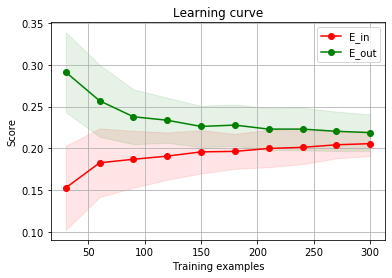

In [167]:
%%time
logreg  = SVC(kernel = 'rbf')
X, y = make_circles(n_samples=500, factor=.5, noise=.3) 
 
cv = ShuffleSplit(n_splits=50, test_size=0.4 )
train_size=np.linspace(.1, 1.0, 10)
Learning_curve_model(X, y, logreg, cv, train_size)

In [121]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [122]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [94]:
def learning_curves(estimator, data, features, target, train_sizes, cv):
    train_sizes, train_scores, validation_scores = learning_curve(
    estimator, data[features], data[target], train_sizes =
    train_sizes,
    cv = cv, scoring = 'neg_mean_squared_error')
    train_scores_mean = -train_scores.mean(axis = 1)
    validation_scores_mean = -validation_scores.mean(axis = 1)

    plt.plot(train_sizes, train_scores_mean, label = 'Training error')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')

    plt.ylabel('MSE', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    title = 'Learning curves for a ' + str(estimator).split('(')[0] + ' model'
    plt.title(title, fontsize = 18, y = 1.03)
    plt.legend()
    plt.ylim(0,40)

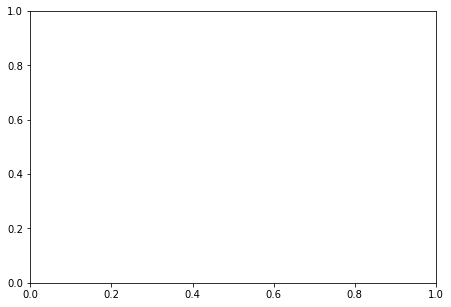

In [95]:
from sklearn.ensemble import RandomForestRegressor

plt.figure(figsize = (16,5))

for model, i in [(RandomForestRegressor(), 1) ]:
    plt.subplot(1,2,i)
    #learning_curves(model, [0], [1], [1], 1, 5)

In [96]:
 np.arange(10, 1000, 100)

array([ 10, 110, 210, 310, 410, 510, 610, 710, 810, 910])

In [99]:
train_df.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [100]:
 # remove Features: Ticket, Cabin
#train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
#test_df  = test_df.drop(['Ticket', 'Cabin'], axis=1)
#combine  = [train_df, test_df]

for dataset in combine:
    dataset['Cabin'] = dataset['Cabin'].fillna('U')
    dataset['Cabin'] = dataset.Cabin.str.extract('([A-Za-z])', expand=False)
    
for dataset in combine:
    dataset['Cabin'] = dataset['Cabin'].map( {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E':0, 
                                            'F':0, 'G':0, 'T':0, 'U':1} ).astype(int)
    
train_df.head()
    

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,1,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,1,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,1,S


In [101]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df  = test_df.drop(['Ticket'], axis=1)
combine  = [train_df, test_df]


# survival rate distribtion as a function of Pclass
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [102]:
# obtain Title from name (Mr, Mrs, Miss etc)
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)


for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Dona'],'Royalty')
    dataset['Title'] = dataset['Title'].replace(['Mme'], 'Mrs')
    dataset['Title'] = dataset['Title'].replace(['Mlle','Ms'], 'Miss')
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Col', 'Major','Rev'], 'Officer')
    dataset['Title'] = dataset['Title'].replace(['Jonkheer', 'Don','Sir'], 'Royalty')
    dataset.loc[(dataset.Sex == 'male')   & (dataset.Title == 'Dr'),'Title'] = 'Mr'
    dataset.loc[(dataset.Sex == 'female') & (dataset.Title == 'Dr'),'Title'] = 'Mrs'

#: count survived rate for different titles
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
3,Mrs,0.795276
1,Miss,0.702703
5,Royalty,0.600000
0,Master,0.575000
4,Officer,0.181818
2,Mr,0.158700


In [103]:
# Covert 'Title' to numbers (Mr->1, Miss->2 ...)
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royalty":5, "Officer": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

# Remove 'Name' and 'PassengerId' in training data, and 'Name' in testing data
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]

# if age < 16, set 'Sex' to Child
for dataset in combine:
    dataset.loc[(dataset.Age < 16),'Sex'] = 'Child'
    
# Covert 'Sex' to numbers (female:1, male:2)
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0, 'Child': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,1,S,1
1,1,1,1,38.0,1,0,71.2833,0,C,3
2,1,3,1,26.0,0,0,7.9250,1,S,2
3,1,1,1,35.0,1,0,53.1000,0,S,3
4,0,3,0,35.0,0,0,8.0500,1,S,1


In [104]:
dataset.head(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,892,3,0,34.5,0,0,7.8292,1,Q,1
1,893,3,1,47.0,1,0,7.0000,1,S,3
2,894,2,0,62.0,0,0,9.6875,1,Q,1
3,895,3,0,27.0,0,0,8.6625,1,S,1
4,896,3,1,22.0,1,1,12.2875,1,S,3


In [106]:
# Covert 'Title' to numbers (Mr->1, Miss->2 ...)
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royalty":5, "Officer": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

# Remove 'Name' and 'PassengerId' in training data, and 'Name' in testing data
#train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
#test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]

# if age < 16, set 'Sex' to Child
for dataset in combine:
    dataset.loc[(dataset.Age < 16),'Sex'] = 'Child'
    
# Covert 'Sex' to numbers (female:1, male:2)
#for dataset in combine:
#    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0, 'Child': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,1,S,0.0
1,1,1,1,38.0,1,0,71.2833,0,C,0.0
2,1,3,1,26.0,0,0,7.9250,1,S,0.0
3,1,1,1,35.0,1,0,53.1000,0,S,0.0
4,0,3,0,35.0,0,0,8.0500,1,S,0.0
